In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/sample_data/best_runs.csv')
df

,Player,M1,M2,M3,M4,M5,M6,M7,M8,M9,Total
0,V Kohli,85,55,16,103,95,0,88,101,51,594
1,Q de Kock,100,20,4,109,174,24,114,5,41,591
2,R Ravindra,123,51,9,32,75,116,9,108,42,565
3,RG Sharma,0,131,86,48,46,87,4,40,61,503
4,DA Warner,41,11,163,13,104,81,15,18,53,499
5,HE vander Dussen,108,4,60,26,1,21,133,13,76,442
6,DJ Mitchell,0,48,89,1,130,54,24,29,43,418
7,GJ Maxwell,15,31,0,3,106,41,0,201,0,397
8,AK Markram,106,1,42,56,60,91,6,9,25,396


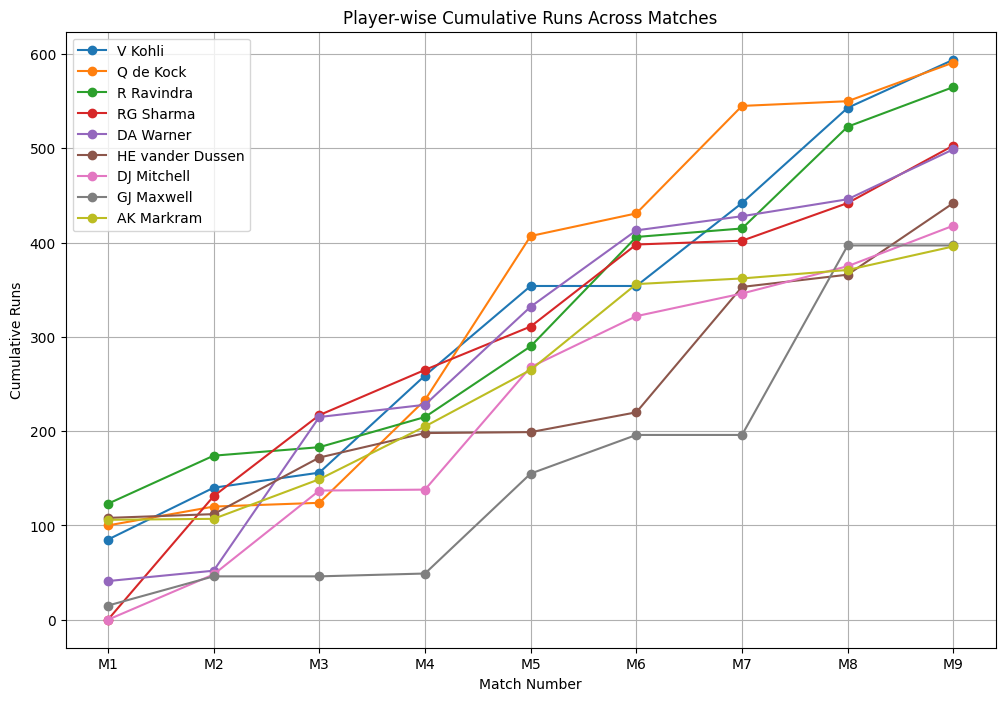

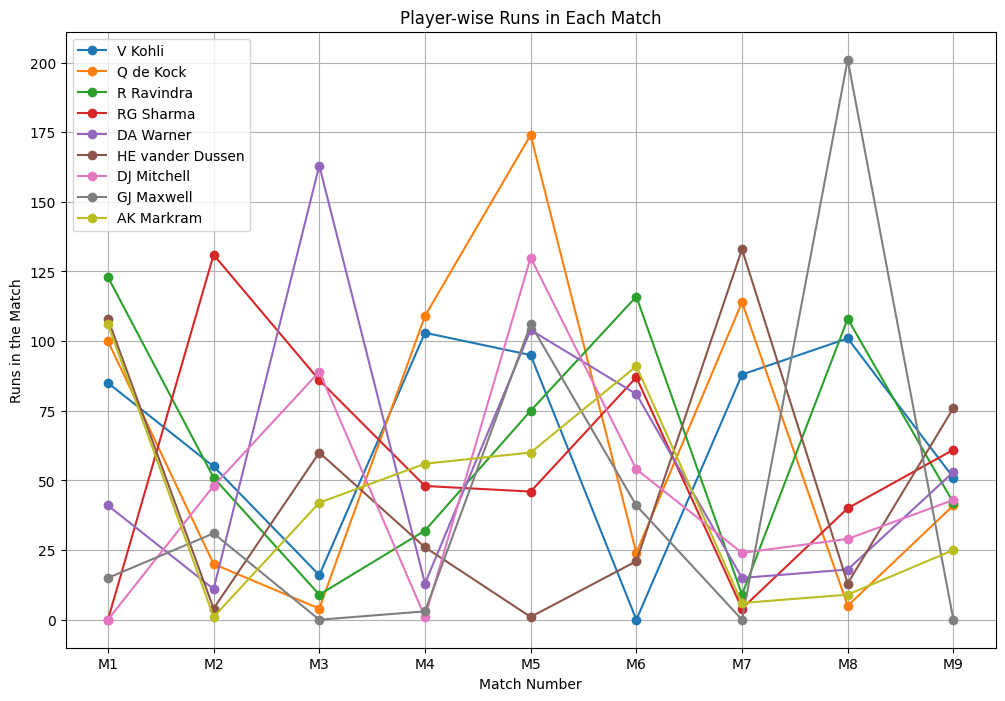

In [25]:
# visualising data

df_plot1 = df.drop('Total', axis=1)
df_plot1.set_index('Player', inplace=True)
cumulative_runs = df_plot1.cumsum(axis=1)

# Plot 1: Cumulative Runs Across Matches
plt.figure(figsize=(12, 8))
for player in cumulative_runs.index:
    plt.plot(cumulative_runs.columns, cumulative_runs.loc[player], label=player, marker='o')

plt.xlabel('Match Number')
plt.ylabel('Cumulative Runs')
plt.title('Player-wise Cumulative Runs Across Matches')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Runs in Each Match
plt.figure(figsize=(12, 8))
for player in df_plot1.index:
    plt.plot(df_plot1.columns, df_plot1.loc[player], label=player, marker='o')

plt.xlabel('Match Number')
plt.ylabel('Runs in the Match')
plt.title('Player-wise Runs in Each Match')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Player'] = le.fit_transform(df['Player'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

X = df.iloc[:, 0:9]  # Match 1 to 9 scores as features
y_m10_scores = df.iloc[:, 8]  # Using M9 scores as a proxy for M10

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y_m10_scores, test_size=0.2, random_state=42)

lr_m10 = LinearRegression()
lr_m10.fit(X_train, y_train)

# Predicting the scores for M10
y_pred_m10 = lr_m10.predict(X_test)
mse_m10 = mean_squared_error(y_test, y_pred_m10)
rmse_m10 = np.sqrt(mse_m10)

# Predicting M10 score using the entire dataset (as we need predictions for each player)
predicted_m10_scores = lr_m10.predict(X)
rmse_m10, predicted_m10_scores


{'AK Markram': 0, 'DA Warner': 1, 'DJ Mitchell': 2, 'GJ Maxwell': 3, 'HE vander Dussen': 4, 'Q de Kock': 5, 'R Ravindra': 6, 'RG Sharma': 7, 'V Kohli': 8}


(39.886905266255596,
 array([101.        ,  38.34722645, 108.        ,  40.        ,
         18.        ,  13.        ,  29.        , 155.50392422,
          9.        ]))

In [27]:
# Preparing data for M11 score prediction
X = df.iloc[:, 0:10]  # Match 1 to 10 scores as features
y_m11_scores = df.iloc[:, 9]  # Using M9 scores as a proxy for M10
X_train, X_test, y_train, y_test = train_test_split(X, y_m11_scores, test_size=0.2, random_state=42)

lr_m11 = LinearRegression()
lr_m11.fit(X_train, y_train)

y_pred_m11 = lr_m11.predict(X_test)
mse_m11 = mean_squared_error(y_test, y_pred_m11)
rmse_m11 = np.sqrt(mse_m11)

# Predicting M11 score using the entire dataset (as we need predictions for each player)
predicted_m11_scores = lr_m11.predict(X)
rmse_m11, predicted_m11_scores

(31.756097506028006,
 array([51.        , 21.55897595, 42.        , 61.        , 53.        ,
        76.        , 43.        , 40.48389855, 25.        ]))

In [28]:
# add new columns to the dataframe for storing the predicted scores
df['M10'] = predicted_m10_scores.round().astype(int)
df['M11'] = predicted_m11_scores.round().astype(int)

df = df.drop("Total", axis=1)
df

,Player,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11
0,8,85,55,16,103,95,0,88,101,51,101,51
1,5,100,20,4,109,174,24,114,5,41,38,22
2,6,123,51,9,32,75,116,9,108,42,108,42
3,7,0,131,86,48,46,87,4,40,61,40,61
4,1,41,11,163,13,104,81,15,18,53,18,53
5,4,108,4,60,26,1,21,133,13,76,13,76
6,2,0,48,89,1,130,54,24,29,43,29,43
7,3,15,31,0,3,106,41,0,201,0,156,40
8,0,106,1,42,56,60,91,6,9,25,9,25


In [29]:
# update the Total column with the predicted scores
df['Total'] = df['M1'] + df['M2'] + df['M3'] + df['M4'] + df['M5'] + df['M6'] + df['M7'] + df['M8'] + df['M9'] + df['M10'] + df['M11']
df

,Player,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,Total
0,8,85,55,16,103,95,0,88,101,51,101,51,746
1,5,100,20,4,109,174,24,114,5,41,38,22,651
2,6,123,51,9,32,75,116,9,108,42,108,42,715
3,7,0,131,86,48,46,87,4,40,61,40,61,604
4,1,41,11,163,13,104,81,15,18,53,18,53,570
5,4,108,4,60,26,1,21,133,13,76,13,76,531
6,2,0,48,89,1,130,54,24,29,43,29,43,490
7,3,15,31,0,3,106,41,0,201,0,156,40,593
8,0,106,1,42,56,60,91,6,9,25,9,25,430


In [30]:
# replace the Player column with the original names by iterating over the dictionary
for key, value in le_name_mapping.items():
    df['Player'].replace(value, key, inplace=True)

# sort the dataframe by the Total column
df.sort_values(by=['Total'], inplace=True, ascending=False)

df

,Player,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,Total
0,V Kohli,85,55,16,103,95,0,88,101,51,101,51,746
2,R Ravindra,123,51,9,32,75,116,9,108,42,108,42,715
1,Q de Kock,100,20,4,109,174,24,114,5,41,38,22,651
3,RG Sharma,0,131,86,48,46,87,4,40,61,40,61,604
7,GJ Maxwell,15,31,0,3,106,41,0,201,0,156,40,593
4,DA Warner,41,11,163,13,104,81,15,18,53,18,53,570
5,HE vander Dussen,108,4,60,26,1,21,133,13,76,13,76,531
6,DJ Mitchell,0,48,89,1,130,54,24,29,43,29,43,490
8,AK Markram,106,1,42,56,60,91,6,9,25,9,25,430


In [38]:
rank = df["Player"].tolist()

In [39]:
print("Player with The most runs in 2023 will be: ", rank[0])
print("followed by ", rank[1], " and ", rank[2])

Player with The most runs in 2023 will be:  V Kohli
followed by  R Ravindra  and  Q de Kock


In [37]:
# save the dataframe to a csv file
df.to_csv('sample_data/predicted_scores.csv', index=False)

In [40]:
df = pd.read_csv('/content/sample_data/predicted_scores.csv')
df

,Player,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,Total
0,V Kohli,85,55,16,103,95,0,88,101,51,101,51,746
1,R Ravindra,123,51,9,32,75,116,9,108,42,108,42,715
2,Q de Kock,100,20,4,109,174,24,114,5,41,38,22,651
3,RG Sharma,0,131,86,48,46,87,4,40,61,40,61,604
4,GJ Maxwell,15,31,0,3,106,41,0,201,0,156,40,593
5,DA Warner,41,11,163,13,104,81,15,18,53,18,53,570
6,HE vander Dussen,108,4,60,26,1,21,133,13,76,13,76,531
7,DJ Mitchell,0,48,89,1,130,54,24,29,43,29,43,490
8,AK Markram,106,1,42,56,60,91,6,9,25,9,25,430


In [41]:
cent = []
for player in range(len(df)):
  century = 0
  for index, row in df.iteritems():
    if 'M' in index:
      if row[player] > 99:
        century += 1
  cent.append(century)
print(cent)

[3, 4, 4, 1, 3, 2, 2, 1, 1]


<ipython-input-41-c3a501dbd1f1>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df.iteritems():


In [42]:
# add the new column for Centuries and then sort
df['Centuries'] = cent
df.sort_values(by=['Centuries'], inplace=True, ascending=False)
df

,Player,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,Total,Centuries
1,R Ravindra,123,51,9,32,75,116,9,108,42,108,42,715,4
2,Q de Kock,100,20,4,109,174,24,114,5,41,38,22,651,4
0,V Kohli,85,55,16,103,95,0,88,101,51,101,51,746,3
4,GJ Maxwell,15,31,0,3,106,41,0,201,0,156,40,593,3
5,DA Warner,41,11,163,13,104,81,15,18,53,18,53,570,2
6,HE vander Dussen,108,4,60,26,1,21,133,13,76,13,76,531,2
3,RG Sharma,0,131,86,48,46,87,4,40,61,40,61,604,1
7,DJ Mitchell,0,48,89,1,130,54,24,29,43,29,43,490,1
8,AK Markram,106,1,42,56,60,91,6,9,25,9,25,430,1


In [43]:
rank = df["Player"].tolist()
print("Player with The most centuries in 2023 will be: ", rank[0], " and ", rank[1])

Player with The most centuries in 2023 will be:  R Ravindra  and  Q de Kock
